Confusion Matrix:
[[64  4]
 [ 3 29]]
Accuracy Score:


C:\Users\Jyotindra\AppData\Local\Temp\ipykernel_7112\2188640568.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set==j,0], X_set[Y_set==j,1],


Jyotindra Tavanoji - 53004230005


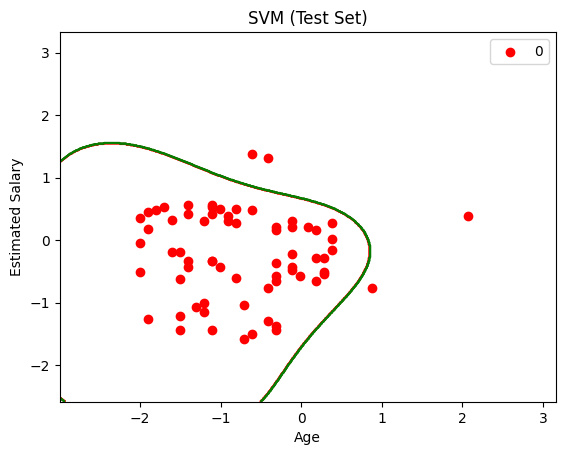

Jyotindra Tavanoji - 53004230005


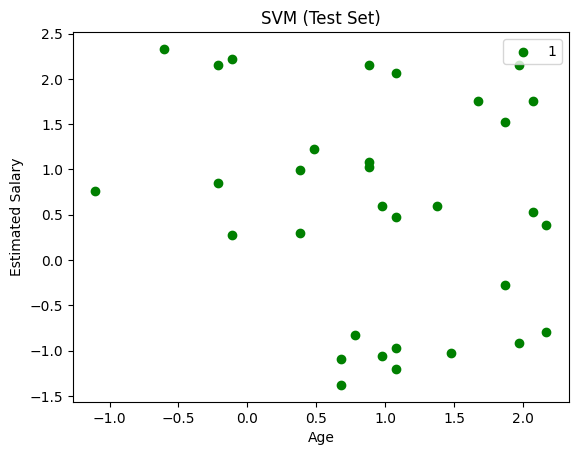

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()
# Split Dataset into X and Y
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values
# Split the X and Y dataset into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
# Perform feature scaling- feature scaling helps us to normalize the data within a particular range
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Fit SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, Y_train)
# Predict the test set results
Y_pred = classifier.predict(X_test)
# Make the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cnf = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(cnf)
print('Accuracy Score:')
accuracy_score(Y_test, Y_pred)
#Visualise the Test set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,
stop=X_set[:,0].max()+1,step=0.01),
np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1,step=0.01))
plt.contour(X1, X2,
classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha=0.75,
cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0], X_set[Y_set==j,1],
    c=ListedColormap(('red','green'))(i),label=j)
    plt.title('SVM (Test Set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    print('Jyotindra Tavanoji - 53004230005') 
    plt.show()